In [14]:
import gym
import numpy as np

# Frozen Lake v1 환경 생성
env = gym.make('FrozenLake-v1')

# Q-table 초기화
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))
rewardList = []

# 하이퍼파라미터 설정
learning_rate = 0.1
discount_rate = 1
n_episodes = 10000
max_steps_per_episode = 100

# epsilon-greedy 정책 설정
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001

# 상태를 이산적인 값으로 변환하는 함수
def state_to_id(state):
    if isinstance(state, tuple):
        return state[0]
    else:
        return state

# Q-learning 알고리즘
for episode in range(n_episodes):
    state = env.reset()
    done = False
    step = 0
    rewardAll = 0
    
#     print("=========================")
    
    for step in range(max_steps_per_episode):
        
        state = state_to_id(state)
        
        # epsilon-greedy 정책에 따라 행동 선택
        tradeoff = np.random.uniform(0, 1)
        if tradeoff > epsilon:
            action = np.argmax(Q[state, :])
        else:
            action = env.action_space.sample()
        
        # 다음 상태, 보상, 종료 여부, 디버깅 정보 얻기
        next_state, reward, done, _, _ = env.step(action)
        next_state = state_to_id(next_state)
        
        # Q-value 업데이트
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_rate * np.max(Q[next_state, :]) - Q[state, action])
        rewardAll += reward
        
        # 다음 상태로 이동
        state = next_state
        
        # 종료 조건 검사
        if done:
            break
    
    # epsilon 값 감소
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    
    rewardList.append(rewardAll)
#     print("rewardList: ", rewardList)

In [15]:
print("Score over time: " +  str(sum(rewardList)/n_episodes))

Score over time: 0.091


In [16]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[0.85001054 0.85009794 0.85050774 0.85094246]
 [0.67215863 0.54235065 0.61307163 0.85094246]
 [0.77616504 0.78202914 0.76090475 0.85094246]
 [0.58274651 0.4578615  0.59908161 0.85094246]
 [0.8507561  0.40146677 0.57331867 0.6233718 ]
 [0.         0.         0.         0.        ]
 [0.28882991 0.16786912 0.56583466 0.24443381]
 [0.         0.         0.         0.        ]
 [0.34755305 0.35244301 0.41652659 0.84854266]
 [0.53276806 0.84311418 0.53103778 0.56417284]
 [0.74153354 0.4968292  0.46482119 0.46835505]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.44121911 0.60657034 0.89034436 0.44420459]
 [0.83863998 0.92670663 0.88953587 0.88174504]
 [0.         0.         0.         0.        ]]


### 최적의 정책 구하기 및 출력

Optimal policy:
[[3. 3. 3. 3.]
 [0. 0. 2. 0.]
 [3. 1. 0. 0.]
 [0. 2. 1. 0.]]


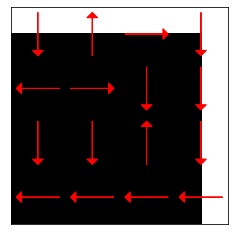

In [17]:
# 최적의 정책 구하기
policy = np.zeros(n_states)
for state in range(n_states):
    policy[state] = np.argmax(Q[state, :])

# 최적의 정책 출력
print("Optimal policy:")
print(policy.reshape(4,4))

# 화살표로 나타내기

import matplotlib.pyplot as plt
import numpy as np

# Q-table에서 각 상태에서 최대 Q-value를 갖는 행동을 알아냄
max_actions = np.argmax(Q, axis=1)

# 각 상태에 화살표로 나타냄
plt.imshow(np.zeros((4,4)), cmap='gray', vmin=0, vmax=1)
for i in range(4):
    for j in range(4):
        if max_actions[i*4+j] == 0:  # up
            plt.arrow(j+0.5, i+0.9, 0, -0.7, head_width=0.2, head_length=0.1, fc='r', ec='r')
        elif max_actions[i*4+j] == 1:  # right
            plt.arrow(j+0.1, i+0.5, 0.7, 0, head_width=0.2, head_length=0.1, fc='r', ec='r')
        elif max_actions[i*4+j] == 2:  # down
            plt.arrow(j+0.5, i+0.1, 0, 0.7, head_width=0.2, head_length=0.1, fc='r', ec='r')
        elif max_actions[i*4+j] == 3:  # left
            plt.arrow(j+0.9, i+0.5, -0.7, 0, head_width=0.2, head_length=0.1, fc='r', ec='r')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.xticks([])
plt.yticks([])
plt.show()